In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pause
import cv2

In [2]:
os.system('adb shell screencap -p /sdcard/screencap.png')
os.system('adb pull /sdcard/screencap.png')

0

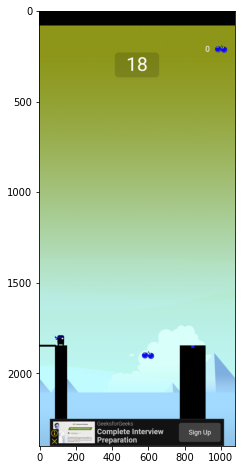

In [3]:

img = cv2.imread('screencap.png')
screen_height, screen_width, _ = img.shape

plt.rcParams["figure.figsize"] = [15,8]
plt.imshow(img)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
yf, xf, zf = np.shape(img)
yf = yf/2480
xf = xf/1080

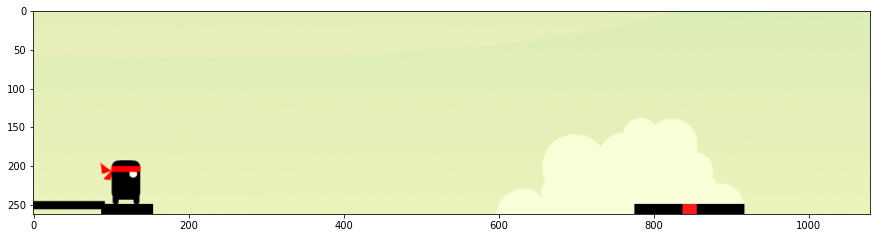

In [5]:
img_crop = img[int(np.floor(1650*yf)):int(np.floor(1920*yf)), :]
plt.imshow(img_crop)
y_crop, x_crop, z_crop = np.shape(img_crop)

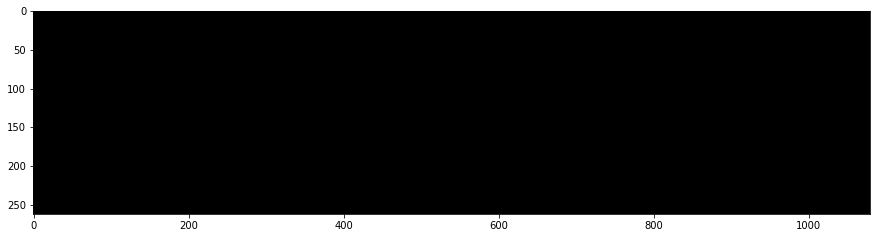

In [6]:
my_img = np.zeros_like(img_crop)


"""    visualise black canvas   """

plt.imshow(my_img)

In [7]:
rcord=set()


for j in range(y_crop):
    for k in range(x_crop):
        if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
            my_img[j,k,0] = 0
            my_img[j,k,1] = 255
            my_img[j,k,2] = 0
            rcord.add(k)  # record the x-coordinates of your red-color cells in a set

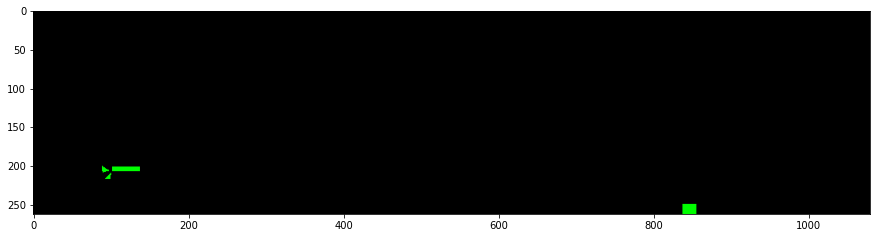

In [8]:
plt.imshow(my_img)

In [9]:
rcord = sorted(rcord)
print(rcord)

[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855]


In [10]:
def srcTarget(rcord):
    prev=rcord[0]
    for i in rcord:
        # print(prev,i)
        if abs(i-prev) > 10:
            return i, prev + 5    # +5 is just to vaguely compenate for extra distance where stick rises
        prev=i

In [11]:
target, src = srcTarget(rcord)
print(src,target)

142 838


In [12]:
dist = abs(src-target)
rate = 1.048* (screen_width/1080)
time = str(int(dist/rate))

print(dist,time)

696 664


In [13]:
x = str(int(np.ceil(530*yf)))
y = str(int(np.ceil(830*xf)))

os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
pause.seconds(3)

[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906]
179 889
710 677
[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835]
163 818
655 625
[102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 

[146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013]
198 996
798 761
[81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341]
133 324
191 182
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790

TypeError: cannot unpack non-iterable NoneType object

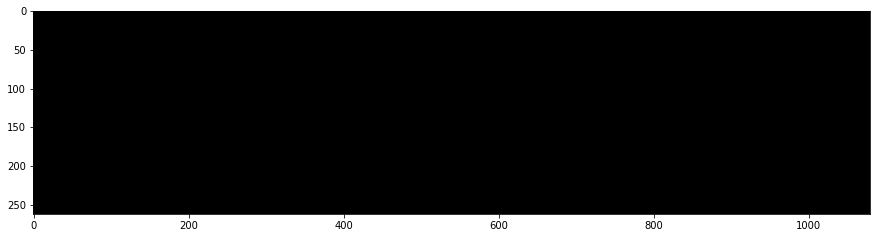

In [14]:
rate = 1.0395
count=0
while count<3:

    os.system('adb shell screencap -p /sdcard/screencap.png')
    os.system('adb pull /sdcard/screencap.png')

    # read the image using openCV
    img = cv2.imread('screencap.png')
    screen_height, screen_width, _ = img.shape

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    yf, xf, zf = np.shape(img)
    yf = yf/2480
    xf = xf/1080
    
    img_crop = img[int(np.floor(1650*yf)):int(np.floor(1920*yf)), :]
    y_crop, x_crop, z_crop = np.shape(img_crop)
    
    my_img = np.zeros_like(img_crop)


    """    visualise black canvas   """

    plt.imshow(my_img)

    rcord=set()


    for j in range(y_crop):
        for k in range(x_crop):
            if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
                my_img[j,k,0] = 0
                my_img[j,k,1] = 255
                my_img[j,k,2] = 0
                rcord.add(k)  
    rcord = sorted(rcord)
    print(rcord)
    def srcTarget(rcord):
        prev=rcord[0]
        for i in rcord:
            # print(prev,i)
            if abs(i-prev) > 10:
                return i, prev + 7    
            prev=i
       
    target, src = srcTarget(rcord)
    print(src,target)
    
    dist = abs(src-target)
    rate = 1.048* (screen_width/1080)
    time = str(int(dist/rate))

    print(dist,time)
    
    x = str(int(np.ceil(530*yf)))
    y = str(int(np.ceil(830*xf)))

    os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
    pause.seconds(3)
    